In [17]:
import os
import time
import uuid
import cv2
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import albumentations as alb

### Collect imags using OpenCV

In [27]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 10

In [29]:
# Initialize video capture object for webcam
cap = cv2.VideoCapture(0)

# Specify the number of images to capture
number_images = 20

# Create a directory to save the images
IMAGES_PATH = 'data\images'
os.makedirs(IMAGES_PATH, exist_ok=True)

# Loop to capture the specified number of images
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))  # Print current image number

    # Read a frame from the webcam
    ret, frame = cap.read()

    # Check if the frame is valid
    if not ret:
        print("Failed to capture frame from the webcam")
        continue

    # Generate a unique image filename
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')

    # Save the captured frame as a JPEG image file
    cv2.imwrite(imgname, frame)

    # Display the captured frame in a window
    cv2.imshow('frame', frame)

    # Pause for 0.5 seconds
    time.sleep(0.5)

    # Check if the 'q' key is pressed to quit capturing
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()

# Close all the display windows
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [25]:
%pip install labelme

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Annotate Images with LabelMe
!labelme

###  Review Dataset and Build Image Loading Function

##### 2.1 Import TF and Deps

In [29]:
# %pip install tensorflow
# %pip insyall json

  Using cached tensorflow-2.12.0-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp38-cp38-win_amd64.whl (272.8 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached h5py-3.8.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached jax-0.4.10-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached grpcio-1.54.2-cp38-cp38-win_amd64.whl (4.1 MB)
  Using cached ml_dtypes-0.1.0-cp38-cp38-win_amd64.whl (120 kB)
  Using cached google_auth-2.18.1-py2.py3-none-any.whl (178 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
  Using cached requests-2.30.0-py3-none-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "insyall" - maybe you meant "install"



In [30]:
%pip install numpy
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


### Limit GPU Memory Growth (If you have GPu)

In [4]:
# List the available physical GPU devices
gpus = tf.config.experimental.list_physical_devices('GPU')

# Set memory growth for each GPU device
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# List the updated physical GPU devices
updated_gpus = tf.config.list_physical_devices('GPU')
print(updated_gpus)

[]


###  Load Image into TF Data Pipeline

In [5]:
### Load Image into TF Data Pipeline

# Create a dataset of image file paths
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle=True)

# Get the next element from the dataset as a numpy array
next_image = images.as_numpy_iterator().next()

# Print the next image file path
print(next_image)

b'data\\images\\50a5d3bf-f536-11ed-84f3-9c2f9d6122a8.jpg'


In [6]:
def load_image(x):
    # Read the image file as bytes
    byte_img = tf.io.read_file(x)

    # Decode the JPEG image from bytes to a tensor
    img = tf.io.decode_jpeg(byte_img)

    # Return the decoded image tensor
    return img

In [7]:
# Apply the 'load_image' function to the dataset
images = images.map(load_image)

In [8]:
# Get the next element from the dataset as a numpy array
images.as_numpy_iterator().next()

array([[[119, 153, 152],
        [122, 154, 153],
        [126, 156, 156],
        ...,
        [183, 160, 168],
        [182, 156, 165],
        [179, 152, 161]],

       [[124, 154, 156],
        [125, 155, 155],
        [131, 157, 158],
        ...,
        [181, 160, 167],
        [179, 156, 166],
        [177, 151, 160]],

       [[130, 153, 159],
        [134, 155, 160],
        [136, 157, 162],
        ...,
        [178, 161, 169],
        [177, 157, 168],
        [173, 153, 162]],

       ...,

       [[ 74, 123, 117],
        [ 74, 121, 113],
        [ 71, 118, 110],
        ...,
        [ 74,  74,  86],
        [ 77,  75,  89],
        [ 79,  77,  91]],

       [[ 72, 123, 118],
        [ 70, 121, 114],
        [ 68, 118, 109],
        ...,
        [ 70,  72,  84],
        [ 72,  74,  86],
        [ 76,  76,  88]],

       [[ 70, 123, 117],
        [ 69, 122, 114],
        [ 69, 118, 112],
        ...,
        [ 68,  72,  83],
        [ 70,  72,  84],
        [ 72,  74,  86]]

In [9]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### View Raw Images with Matplotlib

In [10]:
# Create an image generator by batching the dataset and converting it to a numpy iterator
image_generator = images.batch(4).as_numpy_iterator()

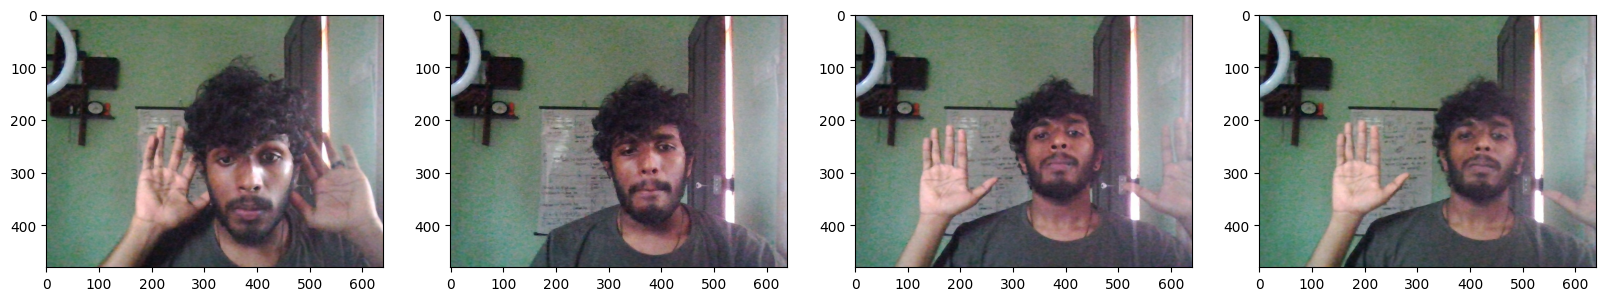

In [12]:
# Create a figure with 4 subplots
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Get the next batch of images as a numpy array
plot_images = image_generator.next()

# Iterate over the images and plot them on each subplot
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)

# Show the plot with the images
plt.show()

### 3. Partition Unaugmented Data

MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [14]:
20*.7 #56 pics into train

14.0

In [15]:
20*.15 #12 to val 12 to test

3.0

### Move the Matching Labels

In [16]:
import os
# Iterate over the folders ['train', 'test', 'val']
for folder in ['train', 'test', 'val']:
    # Iterate over the files in the 'images' folder of each folder
    for file in os.listdir(os.path.join('data', folder, 'images')):
        # Extract the filename without the extension
        filename = file.split('.')[0] + '.json'
        
        # Set the existing filepath of the label file
        existing_filepath = os.path.join('data', 'labels', filename)
        
        # Check if the label file exists
        if os.path.exists(existing_filepath):
            # Set the new filepath in the specific folder
            new_filepath = os.path.join('data', folder, 'labels', filename)
            
            # Replace the existing label file with the new filepath
            os.replace(existing_filepath, new_filepath)

### Apply Image Augmentation on Images and Labels using Albumentations

Setup Albumentations Transform Pipeline

In [2]:
%pip install albumentations

Note: you may need to restart the kernel to use updated packages.


In [18]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### Load a Test Image and Annotation with OpenCV and JSON

In [24]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [19]:

img = cv2.imread(os.path.join('data','train', 'images','0a55f237-f525-11ed-b9fb-9c2f9d6122a8.jpg'))


In [20]:
with open(os.path.join('data', 'train', 'labels', '0a55f237-f525-11ed-b9fb-9c2f9d6122a8.json'), 'r') as f:
    label = json.load(f)

In [21]:
label['shapes'][0]['points']

[[267.2222222222222, 125.41666666666664],
 [436.66666666666663, 315.6944444444444]]

## Extract Coordinates and Rescale to Match Image Resolution

In [22]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [23]:
coords

[267.2222222222222, 125.41666666666664, 436.66666666666663, 315.6944444444444]

In [24]:
# import numpy as np
coords = list(np.divide(coords, [640,480,640,480]))

In [28]:
coords

[0.41753472222222215,
 0.26128472222222215,
 0.6822916666666666,
 0.6576967592592592]

### Apply Augmentations and View Results

In [26]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [29]:
augmented['bboxes'][0][2:]

(0.9192592592592592, 0.6459876543209876)

In [30]:
augmented['bboxes']

[(0.5427160493827159,
  0.22314814814814807,
  0.9192592592592592,
  0.6459876543209876)]

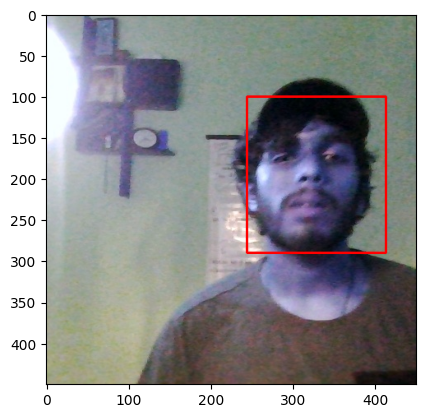

In [31]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

## Build and Run Augmentation Pipeline

#### Run Augmentation Pipeline

In [32]:
for partition in ['train', 'test', 'val']:
    # Iterate over images in the specified partition
    for image in os.listdir(os.path.join('data', partition, 'images')):
        # Read the image
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        # Initialize default coordinates
        coords = [0, 0, 0.00001, 0.00001]

        # Check if a corresponding label file exists
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            # Read the label file
            with open(label_path, 'r') as f:
                label = json.load(f)

            # Update the coordinates with label values
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]

            # Normalize the coordinates
            coords = list(np.divide(coords, [640, 480, 640, 480]))

        try:
            # Augment the image multiple times
            for x in range(60):
                # Apply augmentation on the image and coordinates
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

                # Save the augmented image
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                # Prepare annotation dictionary
                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                # Save the annotation as a JSON file
                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)


### Load Augmented Images to Tensorflow Dataset

In [33]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [35]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [34]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [36]:
train_images.as_numpy_iterator().next()

array([[[0.66023284, 0.5764706 , 0.64411765],
        [0.5663603 , 0.5183211 , 0.58498776],
        [0.60226715, 0.54019606, 0.6050245 ],
        ...,
        [0.14669117, 0.09393382, 0.11795343],
        [0.16574755, 0.14381127, 0.15931372],
        [0.18382353, 0.17126225, 0.16795343]],

       [[0.6037378 , 0.5574755 , 0.59816176],
        [0.559375  , 0.5511642 , 0.6074755 ],
        [0.56096816, 0.5362745 , 0.59822303],
        ...,
        [0.16991422, 0.09454657, 0.11066177],
        [0.23547794, 0.17616421, 0.2016544 ],
        [0.20569853, 0.16960785, 0.17444853]],

       [[0.6356618 , 0.580576  , 0.6117647 ],
        [0.58345586, 0.55447304, 0.61329657],
        [0.56936276, 0.5382353 , 0.5983456 ],
        ...,
        [0.14852941, 0.071875  , 0.10441177],
        [0.18817402, 0.1435049 , 0.16654412],
        [0.20147058, 0.1764706 , 0.18284313]],

       ...,

       [[0.7867647 , 0.74791664, 0.62322307],
        [0.8034314 , 0.74852943, 0.6357843 ],
        [0.7918505 , 0

##  Prepare Labels

#### Build Label Loading Function

In [37]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### Load Labels to Tensorflow Dataset

In [38]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [39]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2742, 0.2856, 0.751 , 0.7886], dtype=float16))

In [40]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [41]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [42]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2742, 0.2856, 0.751 , 0.7886], dtype=float16))

### Combine Label and Image Samples

##### Check Partition Lengths

In [44]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [45]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [46]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [47]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.2363, 0.2299, 0.613 , 0.653 ],
        [0.563 , 0.055 , 1.    , 0.754 ],
        [0.7397, 0.1866, 1.    , 0.733 ],
        [0.3953, 0.2295, 0.9614, 1.    ],
        [0.498 , 0.2297, 0.958 , 0.7437],
        [0.355 , 0.1925, 0.818 , 0.6724],
        [0.667 , 0.2825, 1.    , 0.782 ],
        [0.1937, 0.2147, 0.552 , 0.6885]], dtype=float16))

In [49]:
data_samples = train.as_numpy_iterator()

In [73]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


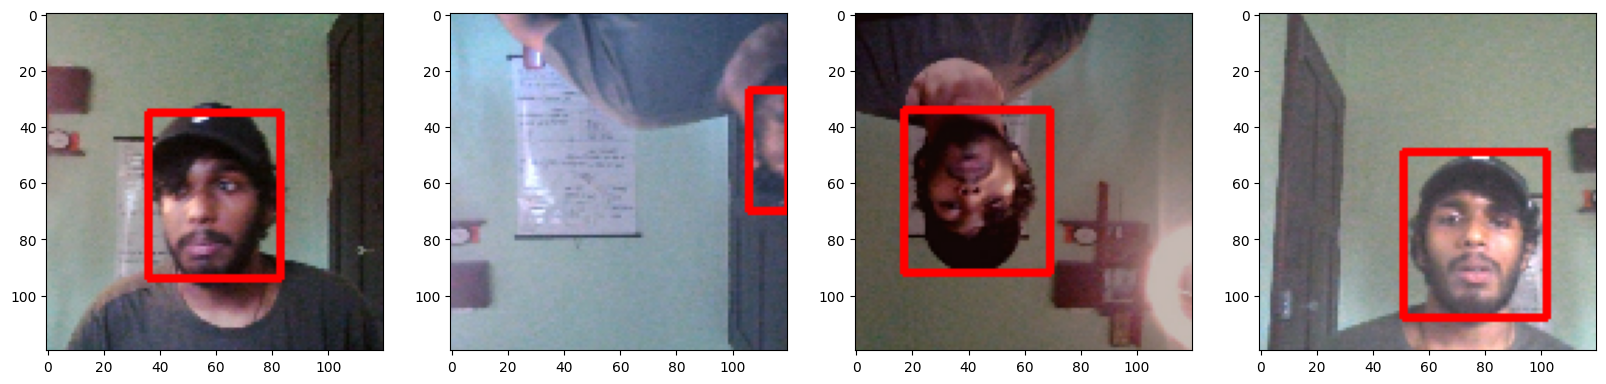

In [74]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

#### Build Deep Learning using the Functional API

In [75]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [76]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 42s 1us/step


In [77]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

#### Build instance of Network

In [79]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1) #sigmoid, map any inputs and maps it into 0 or 1
    
    # Regression model [Bounding box or Square BoX]
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [80]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.03665, 0.2742 , 0.4873 , 0.714  ],
        [0.614  , 0.2646 , 0.9272 , 0.703  ],
        [0.0912 , 0.3003 , 0.4863 , 0.8003 ],
        [0.667  , 0.2825 , 1.     , 0.782  ],
        [0.07764, 0.1304 , 0.4727 , 0.646  ],
        [0.1577 , 0.10156, 0.5527 , 0.617  ],
        [0.365  , 0.258  , 0.799  , 0.758  ],
        [0.506  , 0.2494 , 0.938  , 0.726  ]], dtype=float16))

In [81]:
facetracker = build_model()

In [82]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

###  Test out Neural Network

In [84]:
facetracker = build_model()
X, y = train.as_numpy_iterator().next()

In [85]:
X

array([[[[0.7563726 , 0.6185049 , 0.6395221 ],
         [0.6981618 , 0.5525735 , 0.5878676 ],
         [0.7055147 , 0.6125613 , 0.6265931 ],
         ...,
         [0.3816789 , 0.3934436 , 0.36599264],
         [0.3819853 , 0.37904412, 0.36023283],
         [0.37015933, 0.36807597, 0.3514706 ]],

        [[0.7262255 , 0.6010417 , 0.62555146],
         [0.6870711 , 0.54540443, 0.5836397 ],
         [0.65030634, 0.5346201 , 0.55177695],
         ...,
         [0.3745098 , 0.3740196 , 0.36617646],
         [0.40882352, 0.39442402, 0.39105392],
         [0.38492647, 0.37414217, 0.37806374]],

        [[0.7595588 , 0.5959559 , 0.60042894],
         [0.7283701 , 0.54601717, 0.5704657 ],
         [0.6822917 , 0.54025733, 0.5563725 ],
         ...,
         [0.38976717, 0.37015933, 0.3971201 ],
         [0.39859068, 0.37898284, 0.4023897 ],
         [0.39932597, 0.371875  , 0.40061274]],

        ...,

        [[0.6521446 , 0.81286764, 0.84589463],
         [0.6608456 , 0.8333946 , 0.86966914]

In [86]:
y

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.4343 , 0.0947 , 0.8926 , 0.5425 ],
        [0.2123 , 0.2942 , 0.6626 , 0.734  ],
        [0.1576 , 0.07965, 0.675  , 0.7617 ],
        [0.536  , 0.2202 , 1.     , 0.723  ],
        [0.3545 , 0.3296 , 0.833  , 0.8203 ],
        [0.11115, 0.403  , 0.5586 , 0.9863 ],
        [0.3335 , 0.2089 , 0.742  , 0.737  ],
        [0.1729 , 0.11804, 0.642  , 0.649  ]], dtype=float16))

In [87]:
X.shape

(8, 120, 120, 3)

In [89]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 610ms/step


In [90]:
classes, coords #Classification & Regression output combined

(array([[0.63122946],
        [0.5720169 ],
        [0.60821027],
        [0.61787677],
        [0.5835637 ],
        [0.5737883 ],
        [0.64933103],
        [0.6282455 ]], dtype=float32),
 array([[0.38164732, 0.3620829 , 0.48183972, 0.57802385],
        [0.31667262, 0.3753472 , 0.4396549 , 0.565307  ],
        [0.38679725, 0.35845086, 0.35259745, 0.5462087 ],
        [0.38326037, 0.30577737, 0.42321706, 0.6429772 ],
        [0.3668833 , 0.26144984, 0.4233996 , 0.50582874],
        [0.37723756, 0.33736098, 0.45890433, 0.5095963 ],
        [0.35855755, 0.36467838, 0.3982302 , 0.5652589 ],
        [0.3449201 , 0.35268036, 0.4008817 , 0.62041515]], dtype=float32))

### Define Losses and Optimizers

In [91]:
len(train)

525

In [92]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [105]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)


### Create Localization Loss and Classification Loss

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError

# def calculate_losses(y_true, y_pred):
#     # Classification Loss
#     classification_loss = BinaryCrossentropy()(y_true[0], y_pred[0])

#     # Regression Loss (Localization)
#     regression_loss = MeanSquaredError()(y_true[1], y_pred[1])

#     return classification_loss, regression_loss

# # Example usage
# y_true = [true_classification_labels, true_regression_labels]
# y_pred = [predicted_classification_scores, predicted_regression_outputs]

# classification_loss, regression_loss = calculate_losses(y_true, y_pred)

# # Print the losses
# print("Classification Loss:", classification_loss.numpy())
# print("Regression Loss (Localization):", regression_loss.numpy())

'''
If you want to use a combination of coordinate difference and size difference as the loss for the regression (localization) task, you can use the localization_loss function you provided.

If you prefer to use binary cross-entropy for classification and mean squared error for regression as separate loss functions, you can use the code I provided earlier.
'''


In [94]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [95]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### Test out Loss Metrics

In [96]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5736473>

In [97]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.49851316>

In [98]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5736473>

### Train Neural Network

Create Custom Model Class

In [99]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [100]:
model = FaceTracker(facetracker)

In [106]:

model.compile(opt, classloss, regressloss)    

## Train

In [107]:
logdir='logs'

In [108]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [109]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
417/525 [======================>.......] - ETA: 6:49 - total_loss: 0.3339 - class_loss: 0.0630 - regress_loss: 0.3024